### Import Libraries

In [1]:
import warnings
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, timedelta
import strategy as mod

sns.set(style='ticks')
warnings.filterwarnings('ignore')

In [2]:
# Load and clean the data

data = pd.read_csv("S:/Dissertation 2023/Stock market analysis/stock_market_strategy_analysis/data_files/tcs.csv",
                   index_col=0, parse_dates=[0], dayfirst=True)
# Step 1
tcs_df = mod.prepare_data(data)

## Strategy I - 50-day & 100-day EMA crossover

In [3]:
# calculate the indicators
data_strat_1 = mod.ema_crossover(tcs_df, tcs_df['close'])

In [4]:
# Identify optimal buy-sell points

buy_sell_data_1 = mod.get_signals_for_strategy_1(data_strat_1.copy(deep=True))

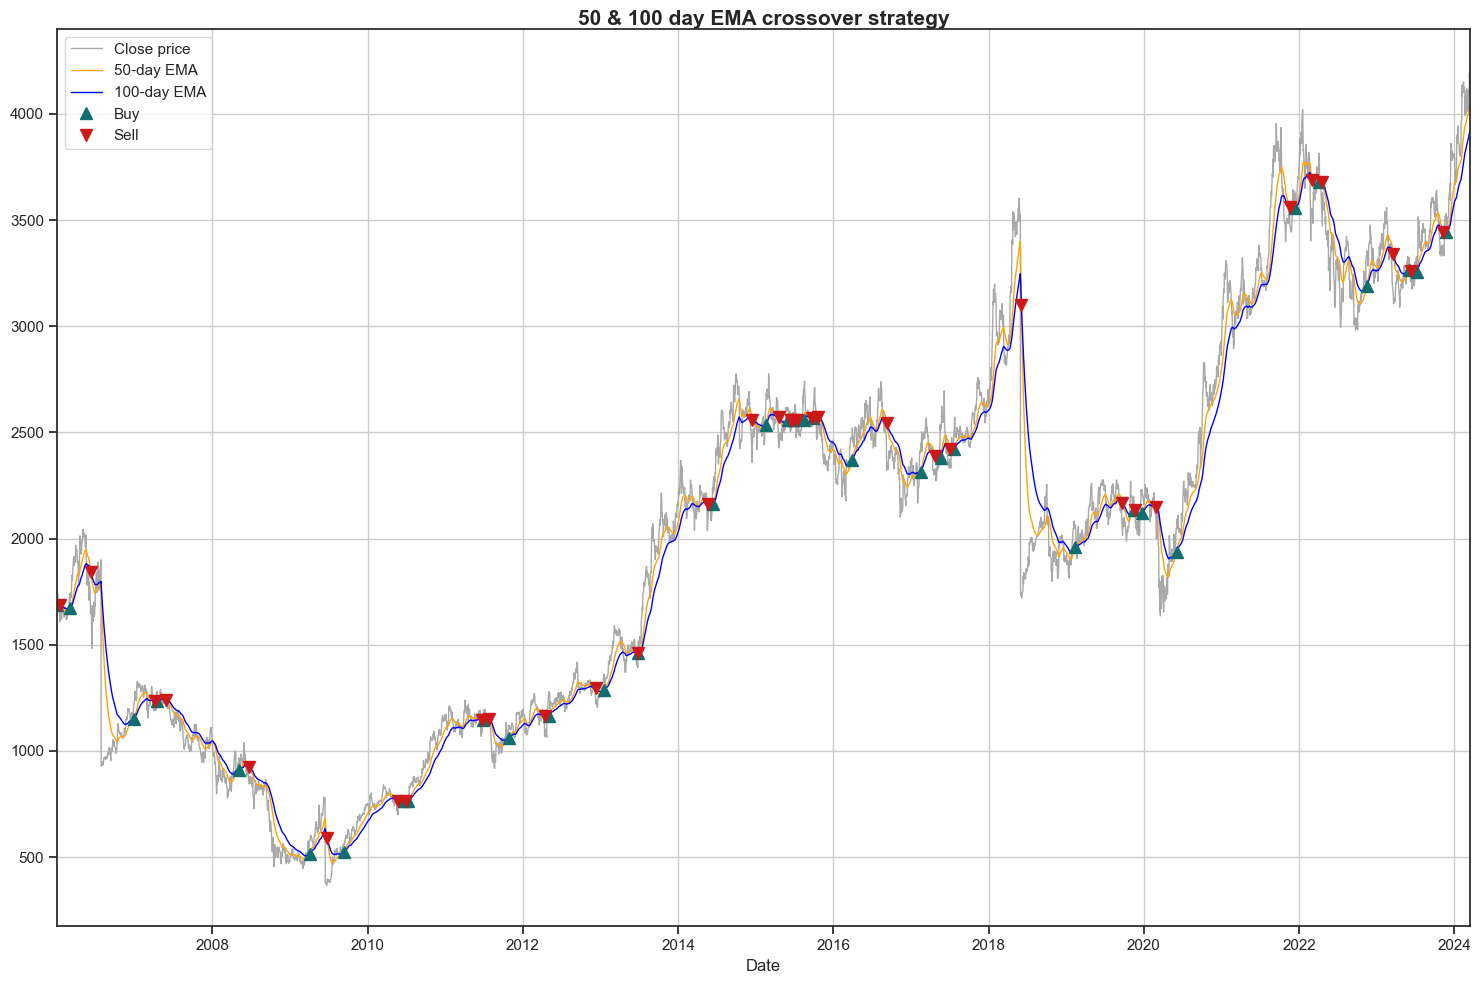

In [5]:
# visualize the buy sell points with the technical indicators in place

buy_signals_1 = buy_sell_data_1.loc[buy_sell_data_1['position'] == 'buy', 'ema_50']
sell_signals_1 = buy_sell_data_1.loc[buy_sell_data_1['position'] == 'sell', 'ema_50']

# Step 6
fig1, ax1 = plt.subplots(nrows=1, figsize=(15, 10))

ax1.plot(buy_sell_data_1.close, color='darkgrey', label='Close price', linewidth=1)
ax1.plot(buy_sell_data_1.ema_50, color='orange', label='50-day EMA', linewidth=1)
ax1.plot(buy_sell_data_1.ema_100, color='blue', label='100-day EMA', linewidth=1)
ax1.set_xlim([buy_sell_data_1.index[0], buy_sell_data_1.index[-1]])

ax1.plot(buy_signals_1.index,
         buy_signals_1,
         '^', markersize=8, color='#116D6E', label='Buy')
ax1.plot(sell_signals_1.index,
         sell_signals_1,
         'v', markersize=8, color='#CD1818', label='Sell')
ax1.legend()

ax1.text(x=0.5, y=1, s='50 & 100 day EMA crossover strategy', fontsize=15, weight='bold',
         ha='center', va='bottom', transform=ax1.transAxes)

plt.xlabel('Date')
plt.tight_layout()
plt.grid()
plt.show()

In [6]:
# Calculate returns

cum_ret_1, portfolio_amount_1 = mod.calculate_cumulative_returns(buy_sell_data_1)

annual_return_1 = mod.calculate_annual_return(buy_sell_data_1, cumulative_return=cum_ret_1)

return_on_investment_1 = mod.calculate_roi(portfolio_amount_1)

print(f"ROI of strategy 1: {return_on_investment_1:.2f}%")
print(f"Annual Return of strategy 1: {annual_return_1 * 100:.2f}%")
print(f"Portfolio Amount at the End of the Investment Period: {portfolio_amount_1:.2f}")

ROI of strategy 1: -28.90%
Annual Return of strategy 1: -0.87%
Portfolio Amount at the End of the Investment Period: 7110.32


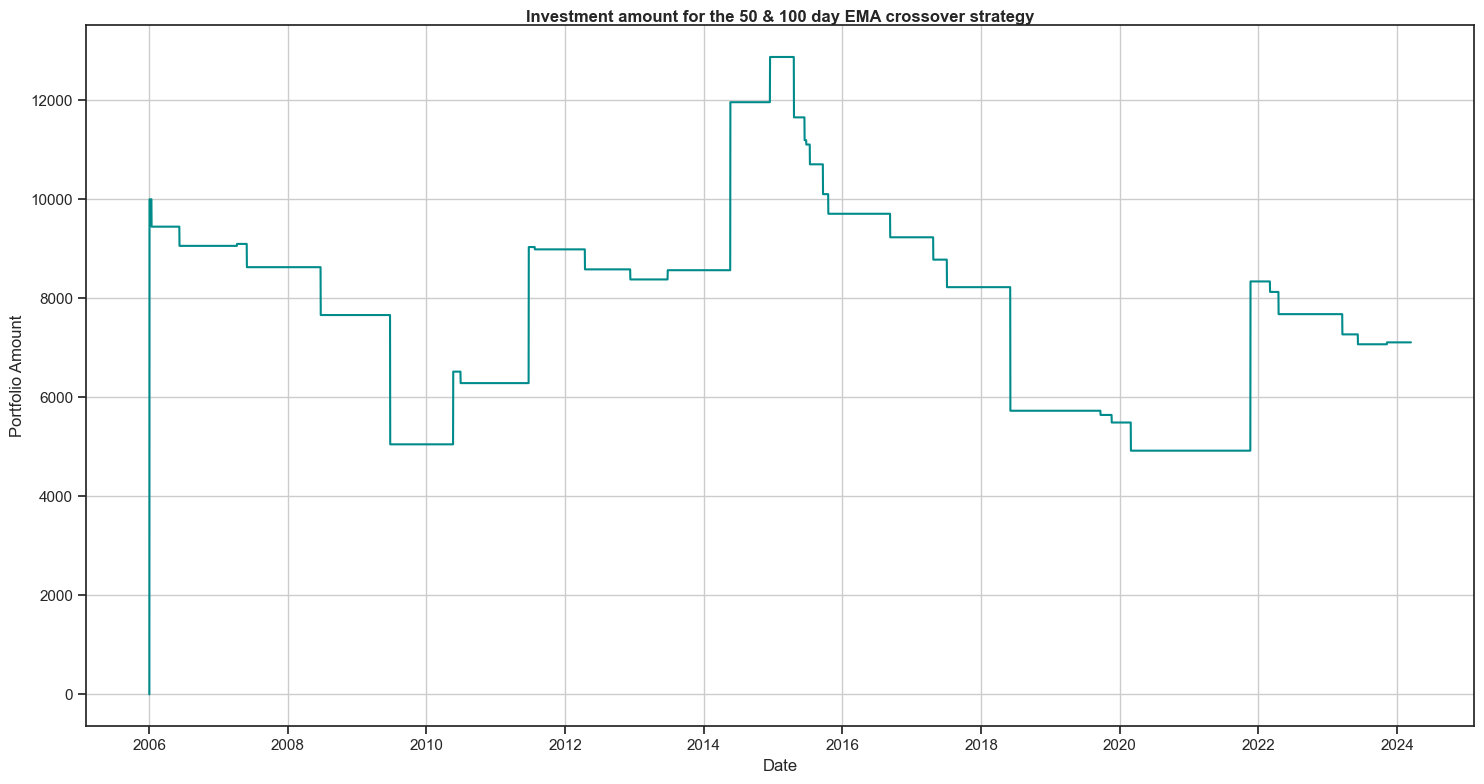

In [7]:
# Visualize the cumulative returns over the investment period

fig, ax1 = plt.subplots(nrows=1, figsize=(15, 8))

# Plot the cumulative returns
ax1.plot(buy_sell_data_1.index, buy_sell_data_1['investment_value'], color='darkcyan', label='Portfolio Amount')
ax1.set_xlabel('Date')
ax1.set_ylabel('Portfolio Amount')
ax1.tick_params('y')
ax1.grid()
ax1.text(x=0.5, y=1, s='Investment amount for the 50 & 100 day EMA crossover strategy', fontsize=12, weight='bold',
         ha='center', va='bottom', transform=ax1.transAxes)

plt.tight_layout()
plt.show()

## Strategy II - Bollinger bands with RSI

In [8]:
# Get the technical indicators for the strategy 2

data_strat_2 = mod.bollinger_bands_with_rsi(tcs_df, tcs_df['close'])

In [9]:
# Identify the buy-sell points

buy_sell_data_2 = mod.get_signals_for_strategy_2(data_strat_2.copy(deep=True))

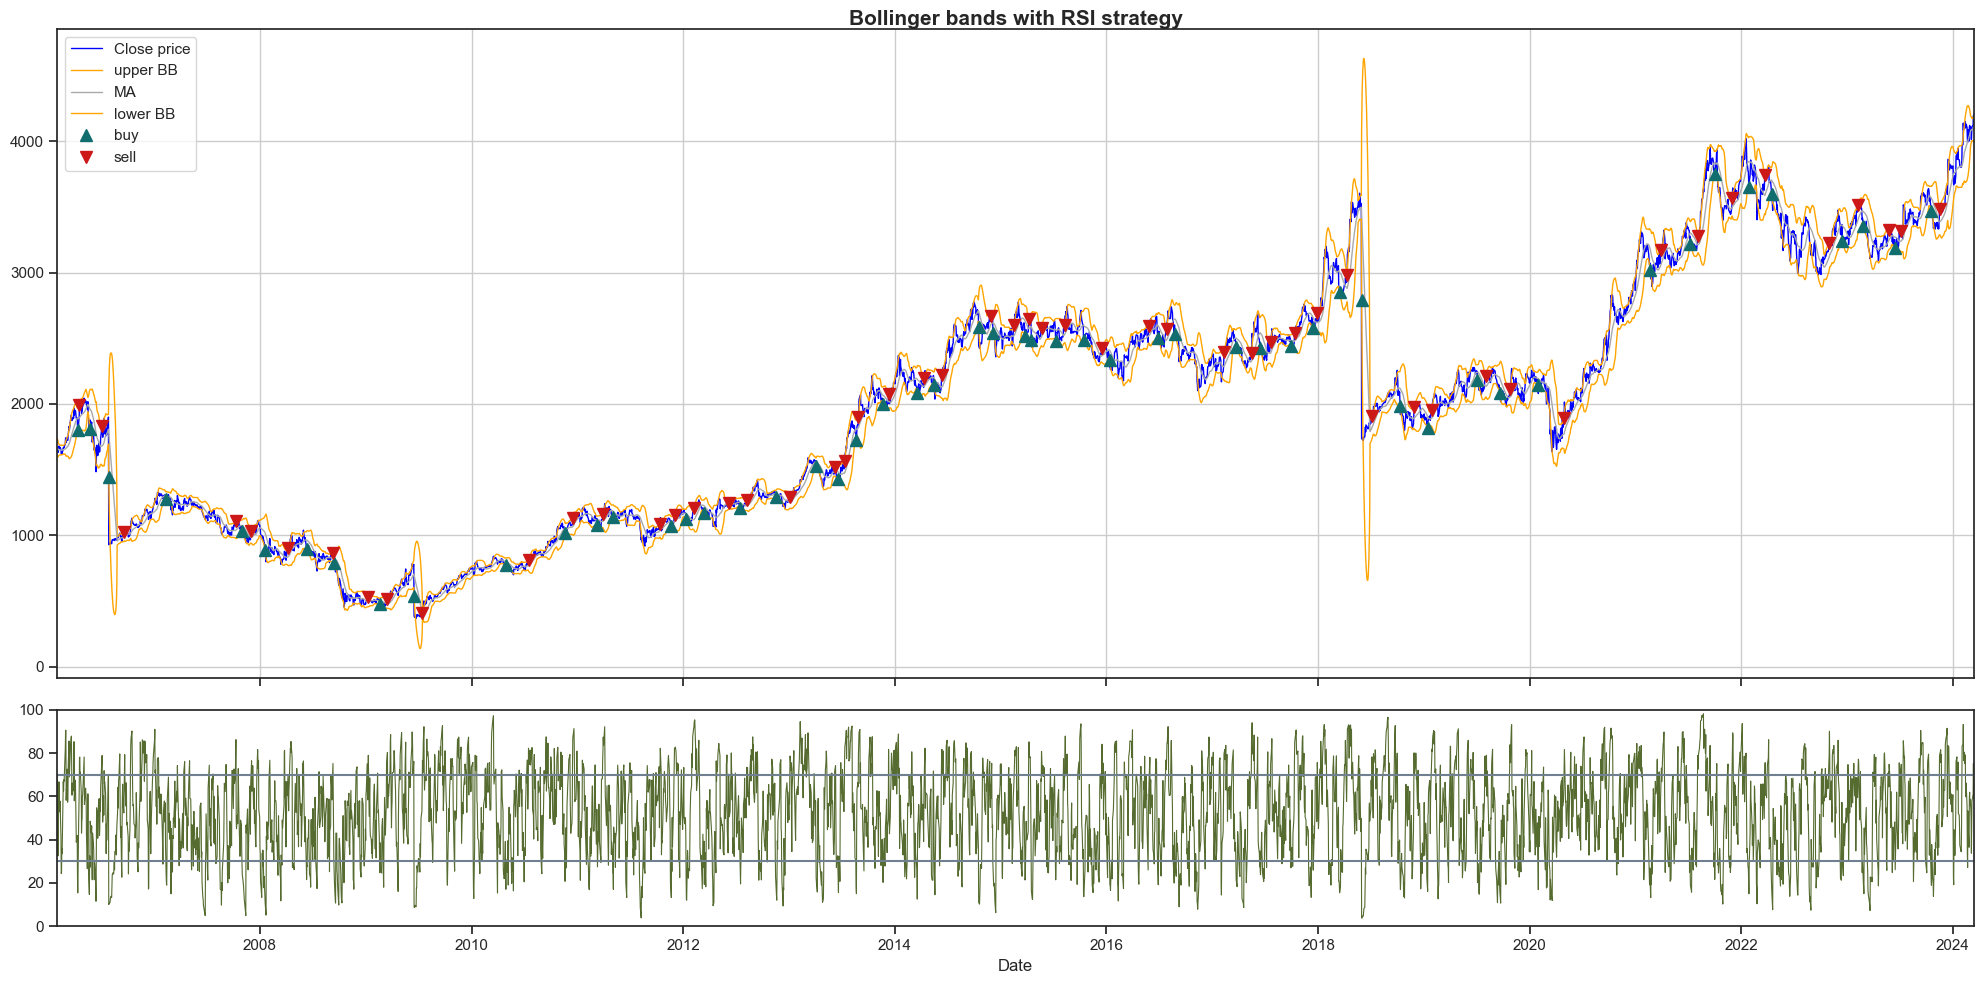

In [10]:
# visualize the buy sell points with the technical indicators in place

buy_signals_2 = buy_sell_data_2.loc[buy_sell_data_2['signal'] == 1, 'lower_bollinger_band']
sell_signals_2 = buy_sell_data_2.loc[buy_sell_data_2['signal'] == -1, 'upper_bollinger_band']

fig2, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 10), sharex=True,
                                gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(buy_sell_data_2.close, color='blue', label='Close price', linewidth=1)
ax1.plot(buy_sell_data_2.upper_bollinger_band, color='orange', label='upper BB', linewidth=1)
ax1.plot(buy_sell_data_2.moving_average_line, color='darkgrey', label='MA', linewidth=1)
ax1.plot(buy_sell_data_2.lower_bollinger_band, color='orange', label='lower BB', linewidth=1)
ax1.set_xlim([buy_sell_data_2.index[0], buy_sell_data_2.index[-1]])

ax1.plot(buy_signals_2.index,
         buy_signals_2,
         '^', markersize=8, color='#116D6E', label='buy')
ax1.plot(sell_signals_2.index,
         sell_signals_2,
         'v', markersize=8, color='#CD1818', label='sell')
ax1.legend()
ax1.text(x=0.5, y=1, s='Bollinger bands with RSI strategy', fontsize=15, weight='bold',
         ha='center', va='bottom', transform=ax1.transAxes)

ax1.grid()

ax2.plot(buy_sell_data_2.rsi, color='darkolivegreen', linewidth=0.8)
ax2.axhline(y=30, color='slategrey', linestyle='-')
ax2.axhline(y=70, color='slategrey', linestyle='-')
ax2.set_ylim([0, 100])

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [11]:
# Calculate returns

cum_ret_2, portfolio_amount_2 = mod.calculate_cumulative_returns(buy_sell_data_2)

annual_return_2 = mod.calculate_annual_return(buy_sell_data_2, cumulative_return=cum_ret_2)

return_on_investment_2 = mod.calculate_roi(portfolio_amount_2)

print(f"ROI of strategy 2: {return_on_investment_2:.2f}%")
print(f"Annual Return of strategy 2: {annual_return_2 * 100:.2f}%")
print(f"Portfolio Amount at the End of the Investment Period: {portfolio_amount_2:.2f}")

ROI of strategy 2: 455.59%
Annual Return of strategy 2: -5.71%
Portfolio Amount at the End of the Investment Period: 55558.98


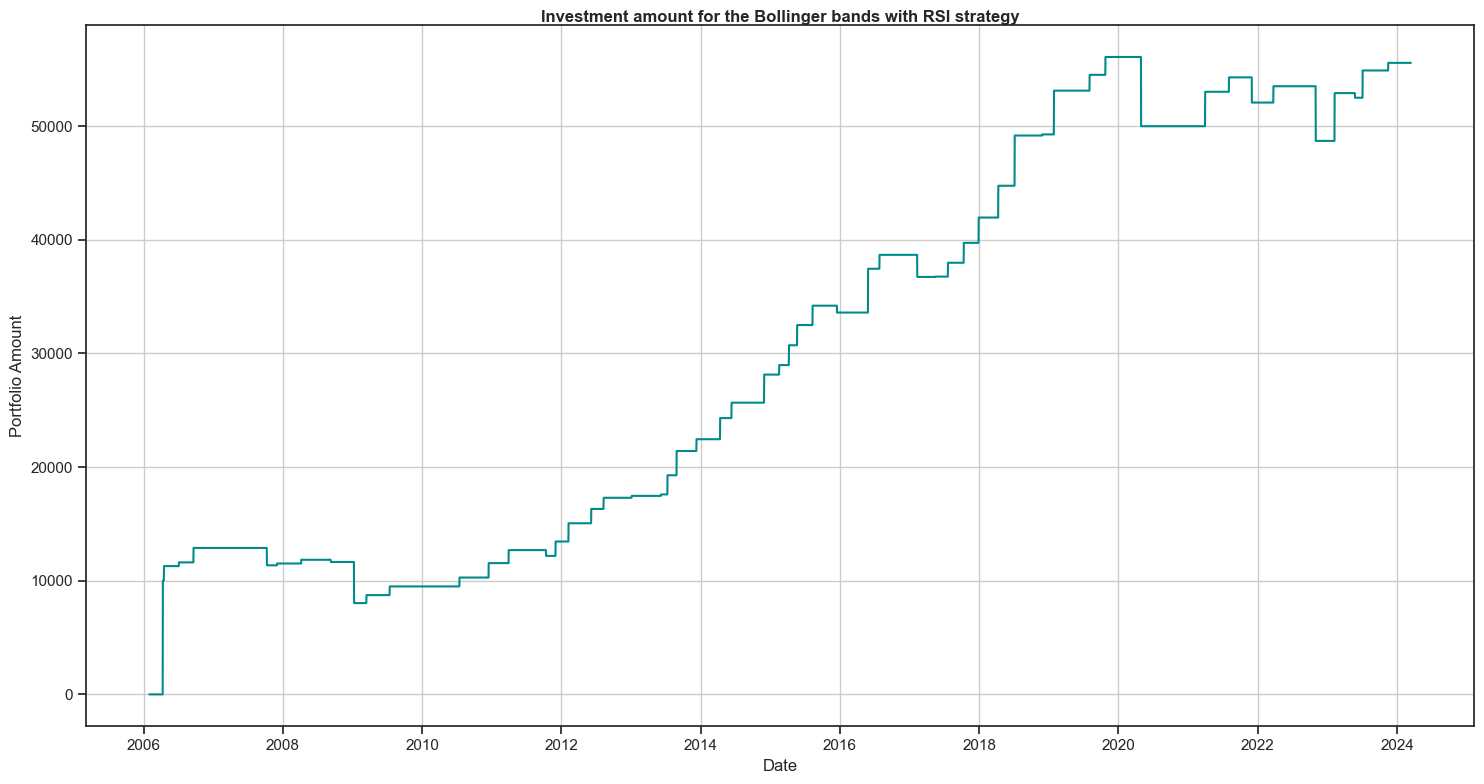

In [12]:
# Visualize the cumulative returns over the investment period

fig, ax1 = plt.subplots(nrows=1, figsize=(15, 8))

# Plot the cumulative returns
ax1.plot(buy_sell_data_2.index, buy_sell_data_2['investment_value'], color='darkcyan', label='Portfolio Amount')
ax1.set_xlabel('Date')
ax1.set_ylabel('Portfolio Amount')
ax1.tick_params('y')
ax1.grid()
ax1.text(x=0.5, y=1, s='Investment amount for the Bollinger bands with RSI strategy', fontsize=12, weight='bold',
         ha='center', va='bottom', transform=ax1.transAxes)

plt.tight_layout()
plt.show()

## Strategy III - MACD with 200-day EMA

In [13]:
# Get the technical indicators for the strategy 3

data_strat_3 = mod.macd_with_ema(tcs_df, tcs_df['close'])

In [14]:
# Identify buy-sell points

buy_sell_data_3 = mod.get_signals_for_strategy_3(data_strat_3.copy(deep=True))

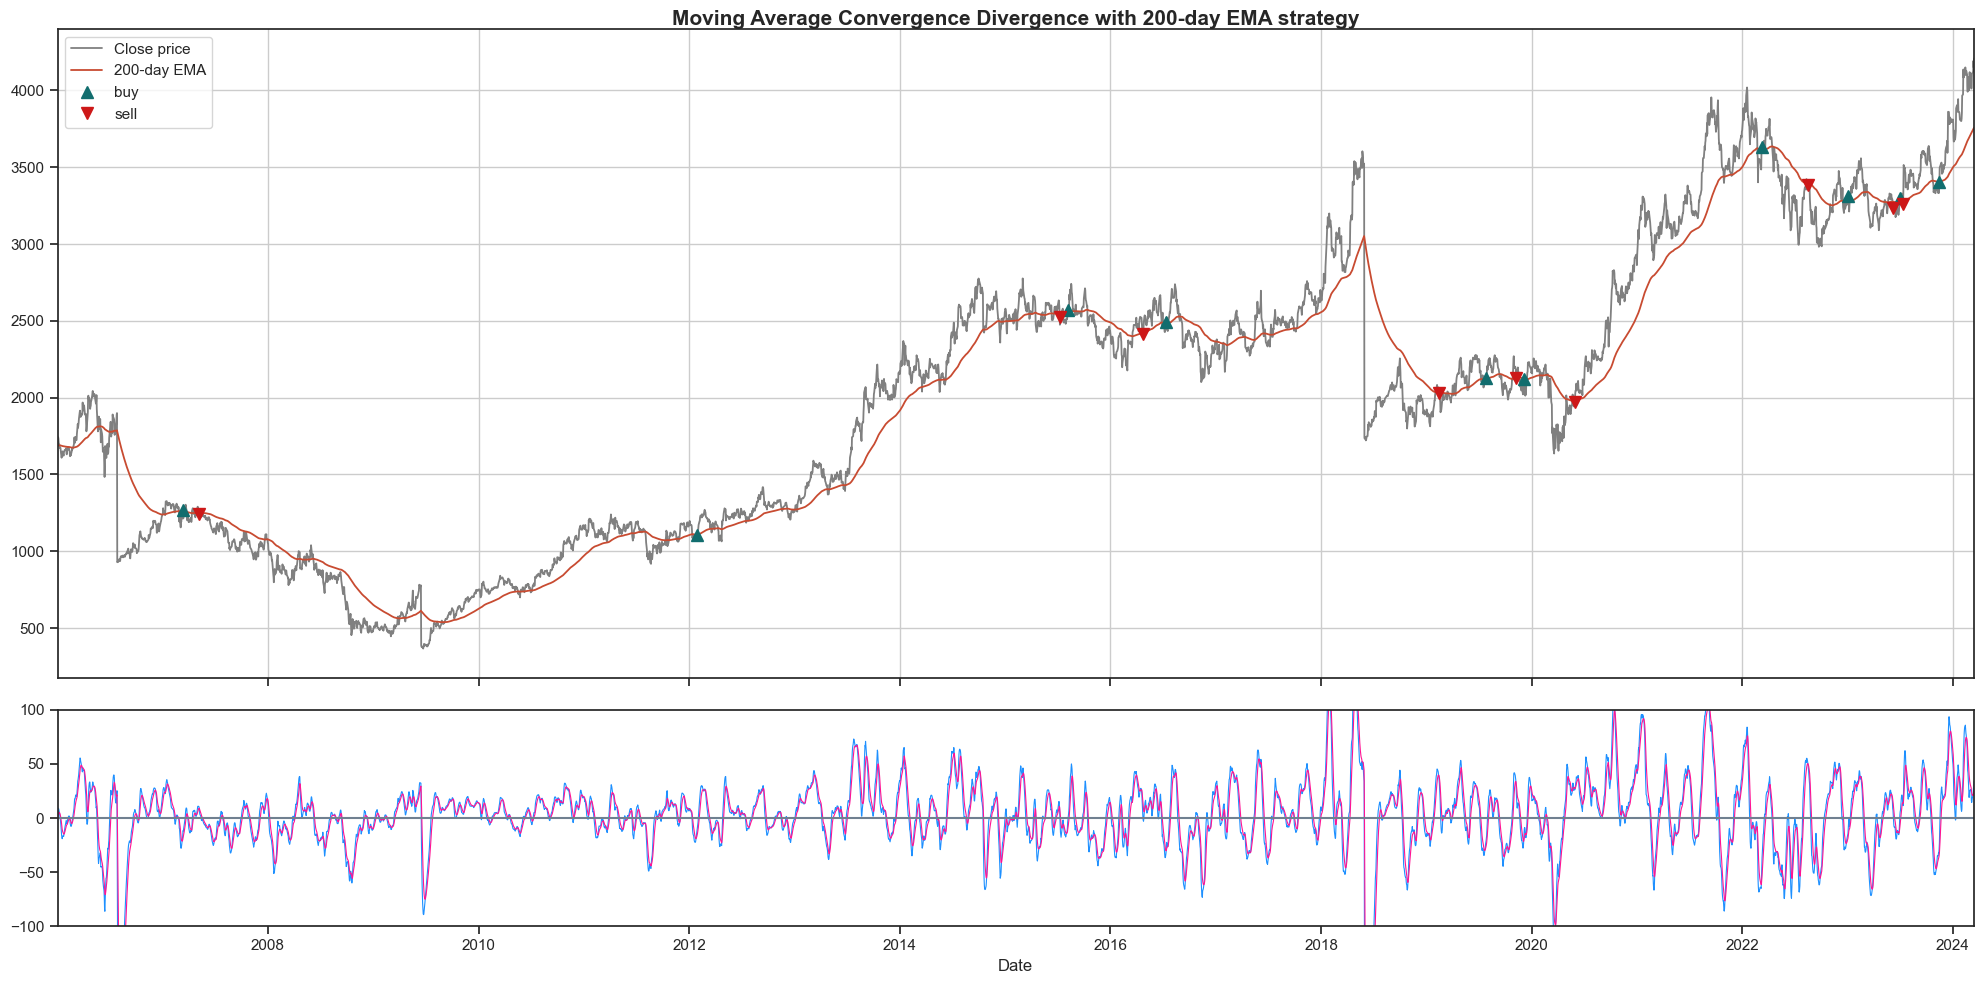

In [15]:
# Visualize the indicators with the identified buy-sell points

buy_signals_3 = buy_sell_data_3.loc[buy_sell_data_3['position'] == 'buy', 'close']
sell_signals_3 = buy_sell_data_3.loc[buy_sell_data_3['position'] == 'sell', 'close']

fig3, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 10), sharex=True,
                               gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(buy_sell_data_3.close, color='grey', label='Close price', linewidth=1.3)
ax1.plot(buy_sell_data_3.ema_200, color='#C84B31', label='200-day EMA', linewidth=1.3)
ax1.set_xlim([buy_sell_data_3.index[0], buy_sell_data_3.index[-1]])

ax1.plot(buy_signals_3.index,
         buy_signals_3,
         '^', markersize=8, color='#116D6E', label='buy')
ax1.plot(sell_signals_3.index,
         sell_signals_3,
         'v', markersize=8, color='#CD1818', label='sell')
ax1.legend()
ax1.text(x=0.5, y=1, s='Moving Average Convergence Divergence with 200-day EMA strategy', fontsize=15, weight='bold',
         ha='center', va='bottom', transform=ax1.transAxes)

ax1.grid()

ax2.plot(buy_sell_data_3.macd_line, color='dodgerblue', linewidth=0.8)
ax2.plot(buy_sell_data_3.signal_line, color='deeppink', linewidth=0.8)
ax2.axhline(y=0, color='slategrey', linestyle='-')

ax2.set_ylim([-100, 100])

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [16]:
# Calculate returns

cum_ret_3, portfolio_amount_3 = mod.calculate_cumulative_returns(buy_sell_data_3)

annual_return_3 = mod.calculate_annual_return(buy_sell_data_3, cumulative_return=cum_ret_3)

return_on_investment_3 = mod.calculate_roi(portfolio_amount_3)

print(f"ROI of strategy 2: {return_on_investment_3:.2f}%")
print(f"Annual Return of strategy 2: {annual_return_3 * 100:.2f}%")
print(f"Portfolio Amount at the End of the Investment Period: {portfolio_amount_3:.2f}")

ROI of strategy 2: 42.10%
Annual Return of strategy 2: -3.27%
Portfolio Amount at the End of the Investment Period: 14209.99


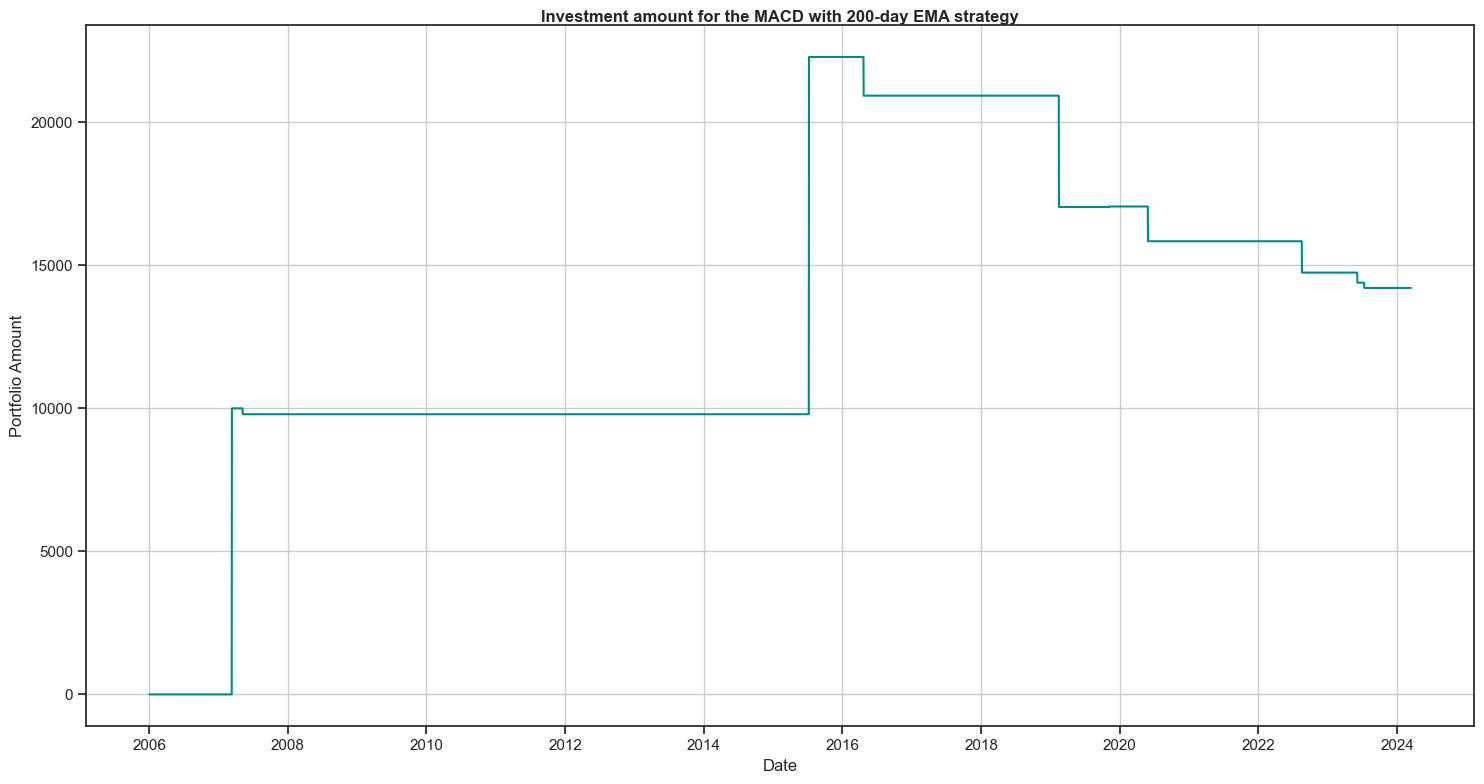

In [17]:
# Visualize the cumulative returns over the investment period

fig, ax1 = plt.subplots(nrows=1, figsize=(15, 8))

# Plot the cumulative returns
ax1.plot(buy_sell_data_3.index, buy_sell_data_3['investment_value'], color='darkcyan', label='Portfolio Amount')
ax1.set_xlabel('Date')
ax1.set_ylabel('Portfolio Amount')
ax1.tick_params('y')
ax1.grid()
ax1.text(x=0.5, y=1, s='Investment amount for the MACD with 200-day EMA strategy', fontsize=12, weight='bold',
         ha='center', va='bottom', transform=ax1.transAxes)

plt.tight_layout()
plt.show()

## Strategy IV - MACD with RSI

In [18]:
# Get the technical indicators for the strategy 4

data_strat_4 = mod.macd_with_rsi(tcs_df, tcs_df['close'])

In [19]:
# Get the buy-sell points

buy_sell_data_4 = mod.get_signals_for_strategy_4(data_strat_4.copy(deep=True))

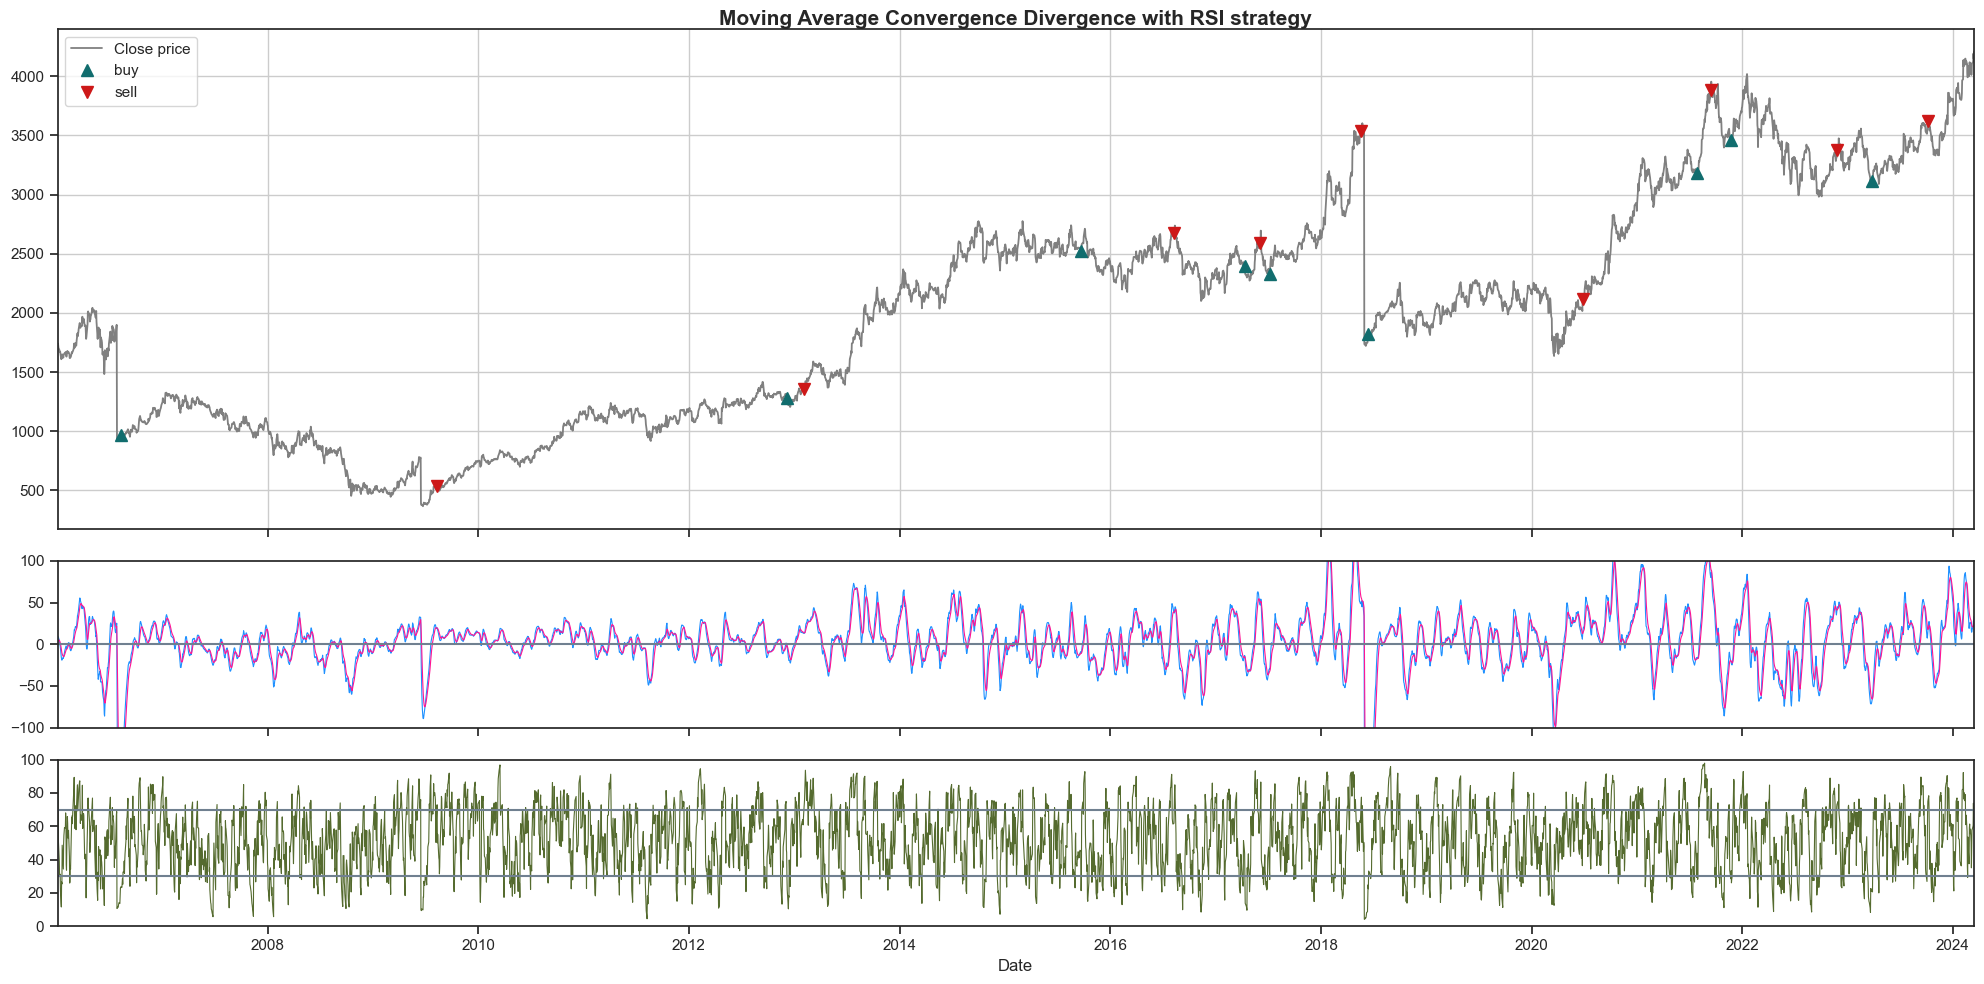

In [20]:
# Visualize the price with indicators (macd & rsi)

buy_signals_4 = buy_sell_data_4.loc[buy_sell_data_4['position'] == 'buy', 'close']
sell_signals_4 = buy_sell_data_4.loc[buy_sell_data_4['position'] == 'sell', 'close']

fig4, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 10), sharex=True,
                                    gridspec_kw={'height_ratios': [3, 1, 1]})

ax1.plot(buy_sell_data_4.close, color='grey', label='Close price', linewidth=1.3)
ax1.set_xlim([buy_sell_data_4.index[0], buy_sell_data_4.index[-1]])

ax1.plot(buy_signals_4.index,
         buy_signals_4,
         '^', markersize=8, color='#116D6E', label='buy')
ax1.plot(sell_signals_4.index,
         sell_signals_4,
         'v', markersize=8, color='#CD1818', label='sell')
ax1.legend()
ax1.text(x=0.5, y=1, s='Moving Average Convergence Divergence with RSI strategy', fontsize=15, weight='bold',
         ha='center', va='bottom', transform=ax1.transAxes)

ax1.grid()

ax2.plot(buy_sell_data_4.macd_line, color='dodgerblue', linewidth=0.8)
ax2.plot(buy_sell_data_4.signal_line, color='deeppink', linewidth=0.8)
ax2.axhline(y=0, color='slategrey', linestyle='-')
ax2.set_ylim([-100, 100])

ax3.plot(buy_sell_data_4.rsi, color='darkolivegreen', linewidth=0.8)
ax3.axhline(y=30, color='slategrey', linestyle='-')
ax3.axhline(y=70, color='slategrey', linestyle='-')
ax3.set_ylim([0, 100])

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [21]:
# Calculate returns

cum_ret_4, portfolio_amount_4 = mod.calculate_cumulative_returns(buy_sell_data_4)

annual_return_4 = mod.calculate_annual_return(buy_sell_data_4, cumulative_return=cum_ret_4)

return_on_investment_4 = mod.calculate_roi(portfolio_amount_4)

print(f"ROI of strategy 2: {return_on_investment_4:.2f}%")
print(f"Annual Return of strategy 2: {annual_return_4 * 100:.2f}%")
print(f"Portfolio Amount at the End of the Investment Period: {portfolio_amount_4:.2f}")

ROI of strategy 2: 64.77%
Annual Return of strategy 2: -3.16%
Portfolio Amount at the End of the Investment Period: 16477.39


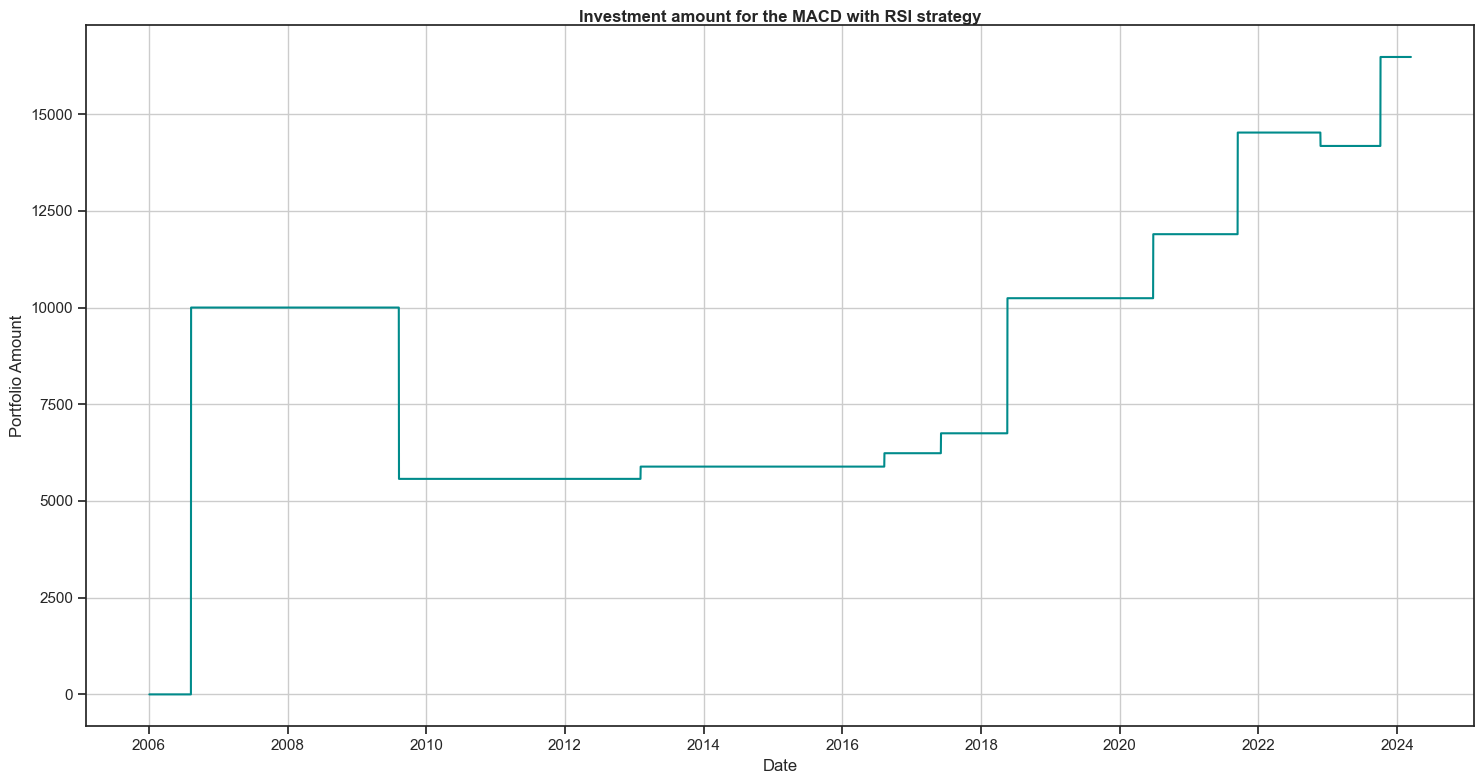

In [22]:
# Visualize the cumulative returns over the investment period

fig, ax1 = plt.subplots(nrows=1, figsize=(15, 8))

# Plot the cumulative returns
ax1.plot(buy_sell_data_4.index, buy_sell_data_4['investment_value'], color='darkcyan', label='Portfolio Amount')
ax1.set_xlabel('Date')
ax1.set_ylabel('Portfolio Amount')
ax1.tick_params('y')
ax1.grid()
ax1.text(x=0.5, y=1, s='Investment amount for the MACD with RSI strategy', fontsize=12, weight='bold',
         ha='center', va='bottom', transform=ax1.transAxes)

plt.tight_layout()
plt.show()